In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# fashion Mnist
#70,000 images
#60k-train #10k test
#28*28
#labels-sparseCategorical

In [4]:
fashionMnist=tf.keras.datasets.fashion_mnist
(trainImages,trainLabels),(testImages,testLabels)=fashionMnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
len(testImages)

10000

In [7]:
trainLabels[0]

9

In [11]:
trainImages[0].shape

(28, 28)

In [12]:
classNames=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankleBoot']

In [17]:
trainImages=trainImages/255.0
testImages=testImages/255.0

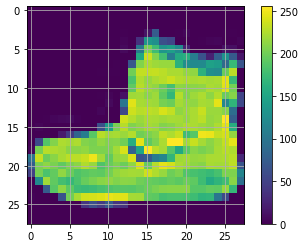

In [16]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.grid(True)

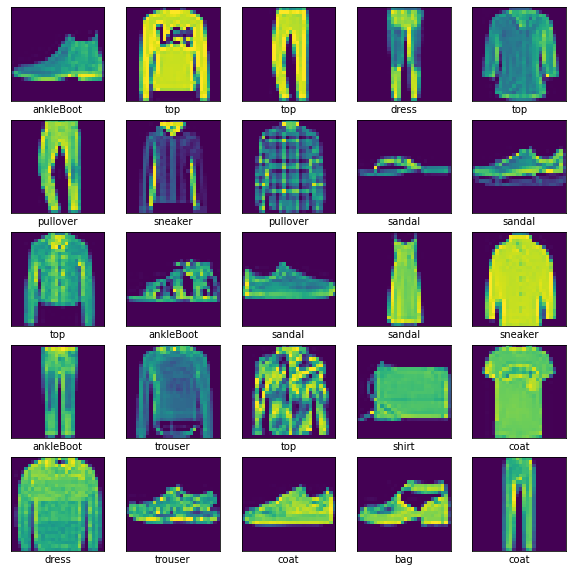

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i])
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [21]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(trainImages,trainLabels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4978 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3739 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3386 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2986 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2815 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2504 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.240

In [24]:
loss,accuracy=model.evaluate(testImages,testLabels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8822


In [27]:
prediction=model.predict(testImages)

In [29]:
np.argmax(prediction[0])

9

In [32]:
import keras_tuner as kt
